#### Data Sampling

The objective of this exercise is convert to our JSON data into a tabular format. Causal modeling software usually requires a dataframe-like object (Ex: [DoWhy](https://github.com/microsoft/dowhy)). Therefore, we need to "flatten" the data in a meaningful way. 

In [125]:
import pathlib, json
import pprint as pp
import random
import pandas as pd
import matplotlib.pyplot as plt
JSON_PATH = pathlib.Path("./data/validated/")
validated = list(JSON_PATH.glob('*.json'))

To fit the data in memory, we subsample based on a few criteria. Here we have chosen year and action (e.g. "hacking")

In [138]:
#List of path objects5
filtered = []
#In memory store of sampled data
content = []
#Subsampling the data

FILTER_YEAR = 2010

for entry in validated:
    with entry.open('r') as f:
        data = json.load(f)
        #Filter by action type 
        if not ('malware' in data['action'] or 'hacking' in data['action']):
            continue
        
        if data['security_incident'] != 'Confirmed':
            continue
            
        if data['timeline']['incident']['year'] < FILTER_YEAR:
            continue
        
        filtered.append(entry)
        content.append(data)
        
print("{0} entries containing hacking or malware after {1}.".format(len(filtered), FILTER_YEAR))

2429 entries containing hacking or malware after 2010.


In [139]:
# Random entry, just to give us an idea of what our data looks like.
pp.pprint(random.choice(content))

{'action': {'hacking': {'variety': ['DoS'], 'vector': ['Web application']}},
 'actor': {'external': {'country': ['Unknown'],
                        'motive': ['Unknown'],
                        'notes': 'unknown',
                        'region': ['000000'],
                        'variety': ['Unknown']}},
 'asset': {'assets': [{'variety': 'S - Web application'}],
           'cloud': ['Unknown']},
 'attribute': {'availability': {'notes': 'question here - it does not appear '
                                         'to have worked so would interruption '
                                         'be correct choice? ',
                                'variety': ['Interruption']}},
 'discovery_method': {'unknown': True},
 'impact': {'overall_rating': 'Unknown'},
 'incident_id': 'D7C1F49D-6144-468E-911B-2CD2FD94E1E8',
 'plus': {'analysis_status': 'First pass',
          'analyst': 'dhylender',
          'created': '2013-11-03T18:38:00Z',
          'github': '603',
          'master_id'

In [140]:
#Flattened data so far. Each dot indicates another nested level.
df = pd.io.json.json_normalize(content)


After flattening our JSON, our list of keynames should look similar to [this](https://github.com/vz-risk/VCDB/blob/master/vcdb-keynames-real.txt). Each dot represents how nested the value is in the original json file. 

Note all the NaNs. A NaN is just a missing value leftover from transforming our nested JSON into a dataframe. For example, an incident where hacking occured may lack variables that are common in malware. [More on how to deal with NaNs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna)

 ##### NB: This section still in progress 

In [149]:
len(df)
df_na_dropped = df.dropna(thresh= .8 * (len(df)), axis=1)
df_na_dropped

,incident_id,reference,schema_version,security_incident,source_id,summary,action.hacking.variety,action.hacking.vector,actor.external.country,actor.external.motive,...,plus.analyst,plus.created,plus.master_id,plus.modified,timeline.incident.year,victim.country,victim.employee_count,victim.industry,victim.region,victim.victim_id
0,0012CC25-9167-40D8-8FE3-3D0DFD8FB6BB,http://www.publicservice.co.uk/news_story.asp?...,1.3.4,Confirmed,vcdb,Sensitive information belonging to jobseekers ...,"[Other, Exploit vuln]",[Web application],[Unknown],[Financial],...,swidup,2013-02-22T16:53:09Z,0012CC25-9167-40D8-8FE3-3D0DFD8FB6BB,2014-05-10T00:58:18Z,2012,[GB],Unknown,51919,[150154],Universal Jobmatch
1,9eda6e80-de98-11e7-9424-7b935f12be98,http://wach.com/news/local/lexington-medical-c...,1.3.4,Confirmed,vcdb,Officials say an employee database was hacked ...,[Unknown],[Web application],[US],[Financial],...,Hylender,2017-12-11T23:56:04.419Z,001bd01d-13c4-40b6-a3a1-d8fcfb185653,2017-12-11T23:56:51.579Z,2017,[US],101 to 1000,622110,"[019201, 019021]",Lexington Medical Center
2,00224226-4A39-435C-BFFD-672B5D61C7C1,http://www.cyberwarnews.info/2013/09/04/7gb-da...,1.3.4,Confirmed,vcdb,leaked info from Azerbaijan electrical producer,[Unknown],[Web application],[Unknown],[Ideology],...,dhylender,2013-09-04T19:29:00Z,00224226-4A39-435C-BFFD-672B5D61C7C1,2014-04-27T19:37:01Z,2013,[AZ],Unknown,221118,[142145],Azerenerji
3,39B1FCE8-E94B-49DD-98AF-8B8E75F52F96,https://www.databreaches.net/quebec-liberals-s...,1.3.4,Confirmed,vcdb,default password exploited,[Brute force],[Web application],[Unknown],[Fun],...,Robert-Topper,2016-09-19T13:07:00Z,002FCB44-829E-405C-84D9-E685D7590FBC,2016-11-11T15:20:00Z,2016,[CA],1 to 10,921110,[019021],Quebec Liberals
4,C40D9A65-15CA-4F96-8AD7-16580C90A4E1,https://www.databreaches.net/some-previously-u...,1.3.4,Confirmed,vcdb,phishing email,[Unknown],[Unknown],"[Unknown, NG]","[Unknown, Financial]",...,Robert-Topper,2016-10-06T13:08:00Z,009AC3BF-BCDC-42F9-8ACE-CC21634608FA,2016-11-04T17:17:00Z,2015,[US],Small,611310,[019021],Boston University
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,396470d0-d959-11e7-a452-77d2890a67ae,https://www.databreaches.net/nhs-trust-cancels...,1.3.4,Confirmed,vcdb,Malware outbreak leads to suspension of operat...,NaN,NaN,[Unknown],[Unknown],...,Spitler,2017-12-05T06:15:47.879Z,ff819481-a65b-4006-8a15-a41855bca465,2017-12-05T06:15:47.879Z,2016,[GB],Unknown,622110,[150154],NHS Trust
2425,FF95E9A6-203E-4A52-A19A-BF442E208C08,http://nakedsecurity.sophos.com/2013/02/23/mic...,1.3.4,Confirmed,vcdb,Microsoft security discovered that a number of...,NaN,NaN,[Unknown],[Unknown],...,NaN,2013-09-10T20:13:32Z,FF95E9A6-203E-4A52-A19A-BF442E208C08,2014-04-27T19:37:03Z,2013,[US],50001 to 100000,511210,[019021],Microsoft
2426,FFAC49C9-FA91-4AE4-97E4-3D7BCC54306A,http://www.esecurityplanet.com/hackers/fifas-s...,1.3.4,Confirmed,vcdb,FIFA's and FIFA president's Twitter accounts w...,[Unknown],[Web application],[SY],[Grudge],...,Spitler,2014-09-02T13:09:00Z,FFAC49C9-FA91-4AE4-97E4-3D7BCC54306A,2014-09-02T13:09:00Z,2013,[Unknown],Unknown,000,[000000],Twitter
2427,FFB73B02-30B8-475E-BD42-706476387A03,http://www.securitybistro.com/blog/?p=6834 (20...,1.3.4,Confirmed,vcdb,Anonymous DDoS Attack Against Israel Leverages...,[DoS],[Web application],[Unknown],[Ideology],...,blackfist,2013-09-11T00:28:00Z,FFB73B02-30B8-475E-BD42-706476387A03,2014-04-27T19:37:03Z,2013,[IL],Unknown,921110,[142145],Israeli Government websites


In [142]:
df_action = df.loc[:, df.columns.str.startswith('action')]

In [143]:
df_loss = df.loc[:, df.columns.str.startswith('impact')]

In [144]:
df_data_disclosure = df.loc[:, df.columns.str.startswith('attribute.confidentiality')]

In [145]:
df_data_disclosure


,attribute.confidentiality.data,attribute.confidentiality.data_disclosure,attribute.confidentiality.data_victim,attribute.confidentiality.state,attribute.confidentiality.notes,attribute.confidentiality.data_total
0,[{'variety': 'Personal'}],Yes,[Customer],[Stored unencrypted],NaN,NaN
1,[{'variety': 'Personal'}],Yes,[Employee],[Stored],NaN,NaN
2,[{'variety': 'Internal'}],Yes,NaN,[Unknown],article says 7 GB's of sensitive data. no othe...,NaN
3,"[{'variety': 'Internal'}, {'variety': 'Other'}]",Yes,NaN,[Stored],NaN,NaN
4,"[{'amount': 174, 'variety': 'Personal'}]",Yes,[Student],[Stored],"names, SSN, and in some cases, driver's licens...",174.0
...,...,...,...,...,...,...
2424,[{'variety': 'Unknown'}],Unknown,NaN,NaN,NaN,NaN
2425,[{'variety': 'Unknown'}],Potentially,NaN,NaN,NaN,NaN
2426,NaN,NaN,NaN,NaN,NaN,NaN
2427,NaN,NaN,NaN,NaN,NaN,NaN


(array([1546.,    0.,    0.,  315.,    0.,    0.,   31.,    0.,    0.,
          57.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

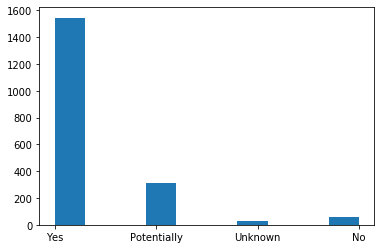

In [147]:
plt.hist(df['attribute.confidentiality.data_disclosure'].dropna(how='any'))